In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from bs4 import BeautifulSoup
# import requests
# from selenium import webdriver
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.by import By
# from selenium.common.exceptions import NoSuchElementException
# import time
%run glassdoor_scrape_tools.ipynb

In [2]:
url_culture = 'https://www.glassdoor.com/Reviews/Workday-Reviews-E197851.htm'

In [224]:
driver = webdriver.Chrome(executable_path=r"D:\\Dev\WebDriver\\chromedriver.exe")

C:\Users\User\AppData\Local\Temp\ipykernel_33784\2963488046.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"D:\\Dev\WebDriver\\chromedriver.exe")


In [227]:
driver.get(url_culture)

In [ ]:
# get overall company reviews
key_metrics = ['title', 'status', 'date_position', 'pros', 'cons', 'advice_to_mgmt', 'helpfulness', 'rating']
df_overall = pd.DataFrame(columns = key_metrics)
df_overall = get_overall_reviews(driver, key_metrics, df_overall)

In [231]:
df_overall.to_excel('workday_raw_overall.xlsx')

In [223]:
# merge all excel files
import glob
import pandas as pd
 
# specifying the path to csv files
path = "D:/HR_Analytics/Workday"
 
# csv files in the path
file_list = glob.glob(path + "/*.xlsx")
 
# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_excel(file))

# DataFrame.
excl_merged = pd.concat(excl_list, ignore_index=True)
 
# exports the dataframe into excel file
# with specified name.
excl_merged.to_excel('workday_total_reviews.xlsx', index=False)

# Data Cleaning

In [12]:
df_overall = pd.read_excel('workday_overall_reviews_clean.xlsx')

In [35]:
# clean the 'status' column
df_overall['Status'] = df_overall.status.map(lambda x: x.split(',')[0] if ',' in x else x)
df_overall.Status = df_overall.Status.apply(status)
# create 'years of experience' column
df_overall['years of experience'] =  df_overall.status.map(lambda x: x.split(',')[1] if ',' in x else None)
df_overall['years of experience'].unique()

array([None, ' more than 8 years', ' more than 1 year',
       ' more than 10 years', ' less than 1 year', ' more than 5 years',
       ' more than 3 years'], dtype=object)

In [36]:
df_overall.head()

,title,status,date_position,pros,cons,advice_to_mgmt,helpfulness,rating,Status,years of experience
0,Best cultural fit for me,Current Employee,"Mar 7, 2022 - Senior Account Manager",Culture is not a tick in the box but the owner...,The operational processes are a bit lagging th...,Never lose your focus on people first..please :),21 people found this review helpful,5,Current,None
1,A great place to work,"Current Employee, more than 8 years","Feb 3, 2023 - Software Development Manager",Workday has an engaged and employee-focused ma...,Workday is working on back-to-office with some...,NaN,Be the first to find this review helpful,5,Current,more than 8 years
2,Good company,"Current Employee, more than 1 year","Feb 2, 2023 - Software Engineer (Swe II)",Good work life balance. Great pay and benefits.,Old leadership that sometimes feels out of tou...,NaN,Be the first to find this review helpful,5,Current,more than 1 year
3,Workday,"Current Employee, more than 10 years","Feb 2, 2023 - Sr. Manager, Operations",Workday's culture is absolutely amazing. They ...,Nothing bad to say about Workday.,Keep doing what you are doing,Be the first to find this review helpful,5,Current,more than 10 years
4,Encouraging Environment,"Former Employee, less than 1 year","Jan 30, 2023 - SDE-intern",- Was a place where you could learn a lot - Te...,"- Make sure to ask questions, it is easy to ge...",Make sure to be transparent and stay updated w...,Be the first to find this review helpful,5,Former,less than 1 year


In [53]:
# clean'date_position' column
# create 'date' column
from datetime import datetime
df_overall['date'] = df_overall['date_position'].apply(lambda x: x.partition(' - ')[0])
df_overall['date'] = df_overall['date'].map(lambda x: x.replace(',', ''))
df_overall['date'] = df_overall['date'].map(lambda x: datetime.strptime(x, '%b %d %Y').date())
df_overall['year'] = pd.DatetimeIndex(df_overall['date']).year
# create 'position' column
df_overall['position'] = df_overall['date_position'].apply(lambda x: x.partition(' - ')[2])
create 'years of experience' column

In [68]:
# clean the 'helpfulness' column
df_overall.helpfulness = df_overall.helpfulness.map(lambda x: x.partition('\xa0people')[0] if 'people' in x else 'None')

In [76]:
df_overall['mgmt'] = df_overall['position'].map(lambda x: 1 if 'Manager' in x else 0)

In [135]:
df_overall.head()

,title,pros,cons,advice_to_mgmt,helpfulness,rating,Status,years of experience,position,date,year,mgmt
0,Best cultural fit for me,Culture is not a tick in the box but the owner...,The operational processes are a bit lagging th...,Never lose your focus on people first..please :),21,5,Current,NaN,Senior Account Manager,2022-03-07,2022.0,1
1,A great place to work,Workday has an engaged and employee-focused ma...,Workday is working on back-to-office with some...,NaN,None,5,Current,more than 8 years,Software Development Manager,2023-02-03,2023.0,1
2,Good company,Good work life balance. Great pay and benefits.,Old leadership that sometimes feels out of tou...,NaN,None,5,Current,more than 1 year,Software Engineer (Swe II),2023-02-02,2023.0,0
3,Workday,Workday's culture is absolutely amazing. They ...,Nothing bad to say about Workday.,Keep doing what you are doing,None,5,Current,more than 10 years,"Sr. Manager, Operations",2023-02-02,2023.0,1
4,Encouraging Environment,- Was a place where you could learn a lot - Te...,"- Make sure to ask questions, it is easy to ge...",Make sure to be transparent and stay updated w...,None,5,Former,less than 1 year,SDE-intern,2023-01-30,2023.0,0


In [177]:
df_overall.to_excel('workday_overall_reviews_clean.xlsx')

In [178]:
df_overall.sort_values(by='helpfulness', ascending=False)

,title,pros,cons,advice_to_mgmt,helpfulness,rating,Status,years of experience,position,date,year,mgmt
2220,S.O.S Dave Duffield,I've been at Workday for 3+ years. I have to ...,Dave if you're reading this please come back a...,Have a whistle blower hotline. Give HR more p...,145,2,Current,more than 3 years,Anonymous Employee,2016-01-30,2016,0
2259,"The ""Great Culture"" does not permeate througho...",Lots of snacks and bagels.\nWork life balance ...,In reading some of the more critical but most ...,Aneel – you seem like a cool guy - do somethi...,135,2,Current,more than 5 years,Manager,2015-12-11,2015,1
1994,From Good to Great to Average...and trending d...,Industry leading product that continues to pul...,Becoming increasingly bureaucratic\nBelow mark...,Develop and distribute an employee engagement ...,130,3,Current,more than 3 years,Anonymous Employee,2016-03-21,2016,0
2194,"I really wanted Workday to be my home, but I j...","Co-workers are smart, dedicated, and very, ver...",Not the place to go if you want to advance you...,I know you are trying hard to keep the culture...,96,3,Current,more than 3 years,Senior Manager,2018-05-10,2018,1
1596,Workday is changing...,-Good local Office Culture. Everyone is friend...,"-They take advantage of being the ""best place ...",At the end of the day if you do not pay your t...,96,5,Current,NaN,Solutions Consultant,2018-05-20,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,Workday -- great company!,"Great product, great support from the company.",Insurance benefits not as good as some other c...,Improve benefits.,0,5,Current,more than 3 years,Senior HCM Trainer,2016-06-09,2016,0
1247,Awesome company!,Great culture & transparency from executives.,"Remote offices miss out on HQ culture, activit...",NaN,0,5,Current,NaN,NaN,2016-04-06,2016,0
1246,Product Management,Great work culture and opportunities.,"Due to continuous improvement of the product, ...",NaN,0,5,Current,NaN,NaN,2016-02-06,2016,0
1245,"great company, great culture","work and life balance, encouraging env for car...",can't think of one now,NaN,0,5,Current,more than 3 years,Anonymous Employee,2020-02-23,2020,0


# Basic Stats and Visualizations

In [145]:
# find the average rating of the company from comments that have more than 10 people find helpful
df_overall[df_overall.helpfulness >= 10].rating.mean()

2.044642857142857

In [146]:
# find the average rating of the company from management comments
df_overall[df_overall.mgmt == 1].rating.mean()

4.175257731958763

In [147]:
# find the average rating of the company from non-management comments
df_overall[df_overall.mgmt == 0].rating.mean()

4.055037313432836

In [179]:
# find average ratings of each year
lst_rating = []
for i in range(2015, 2023):
    rating = df_overall[df_overall.year == i].rating.mean()
    lst_rating.append(rating)

In [186]:
lst_rating

[3.9865771812080535,
 3.7935222672064777,
 3.770731707317073,
 3.8529411764705883,
 3.9360730593607305,
 4.110599078341014,
 4.18716577540107,
 4.352941176470588]

In [183]:
import matplotlib.pyplot as plt

In [185]:
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

Text(0, 0.5, 'average rating')

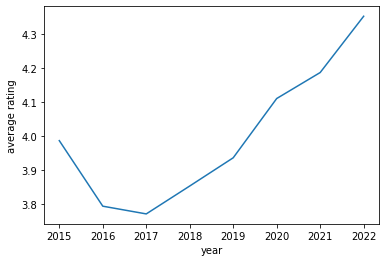

In [190]:
plt.plot(year, lst_rating)
plt.xlabel('year')
plt.ylabel('average rating')

In [191]:
df_help = df_overall[df_overall.helpfulness >= 10]

In [192]:
lst_rating = []
for i in range(2015, 2023):
    rating = df_help[df_help.year == i].rating.mean()
    lst_rating.append(rating)

Text(0, 0.5, 'average rating')

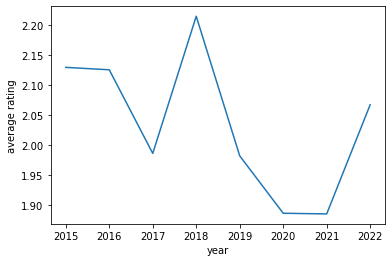

In [193]:
plt.plot(year, lst_rating)
plt.xlabel('year')
plt.ylabel('average rating')

Text(0, 0.5, 'average rating')

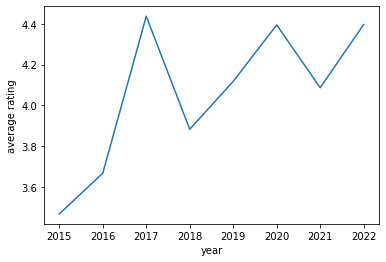

In [197]:
df_mgmt = df_overall[df_overall.mgmt == 1]
lst_rating = []
for i in range(2015, 2023):
    rating = df_mgmt[df_mgmt.year == i].rating.mean()
    lst_rating.append(rating)

plt.plot(year, lst_rating)
plt.xlabel('year')
plt.ylabel('average rating')

Text(0, 0.5, 'average rating')

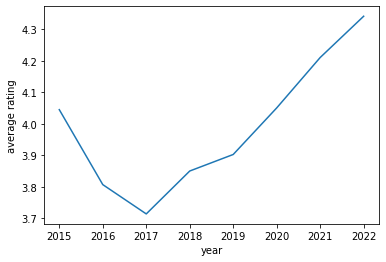

In [199]:
df_non_mgmt = df_overall[df_overall.mgmt == 0]

lst_rating = []
for i in range(2015, 2023):
    rating = df_non_mgmt[df_non_mgmt.year == i].rating.mean()
    lst_rating.append(rating)

plt.plot(year, lst_rating)
plt.xlabel('year')
plt.ylabel('average rating')

# Generate word cloud from reviews' title, pros, cons, and advice to mgmt

In [16]:
df_overall = pd.read_excel('workday_overall_reviews_clean.xlsx')
df_overall.head()

,title,pros,cons,advice_to_mgmt,helpfulness,rating,Status,years of experience,position,date,year,mgmt,job type
0,Best cultural fit for me,Culture is not a tick in the box but the owner...,The operational processes are a bit lagging th...,Never lose your focus on people first..please :),21,5,Current,NaN,Senior Account Manager,2022-03-07,2022,1,NaN
1,A great place to work,Workday has an engaged and employee-focused ma...,Workday is working on back-to-office with some...,NaN,0,5,Current,more than 8 years,Software Development Manager,2023-02-03,2023,1,dev
2,Good company,Good work life balance. Great pay and benefits.,Old leadership that sometimes feels out of tou...,NaN,0,5,Current,more than 1 year,Software Engineer (Swe II),2023-02-02,2023,0,engineer
3,Workday,Workday's culture is absolutely amazing. They ...,Nothing bad to say about Workday.,Keep doing what you are doing,0,5,Current,more than 10 years,"Sr. Manager, Operations",2023-02-02,2023,1,NaN
4,Encouraging Environment,- Was a place where you could learn a lot - Te...,"- Make sure to ask questions, it is easy to ge...",Make sure to be transparent and stay updated w...,0,5,Former,less than 1 year,SDE-intern,2023-01-30,2023,0,NaN


In [17]:
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [18]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [19]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

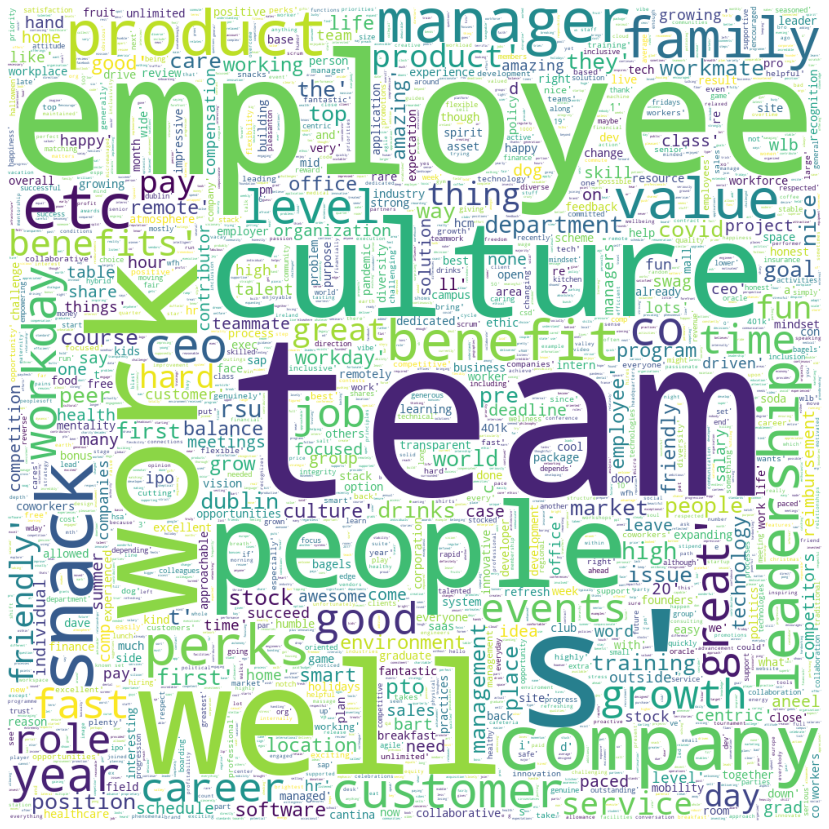

In [26]:
plt.figure(figsize=(15,15))
wordCloudFunction(df_overall, 'pros', 10000000)

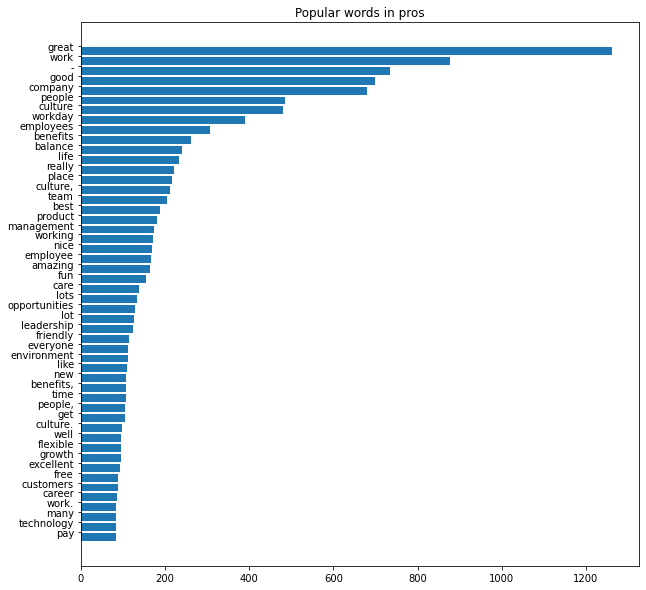

In [23]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df_overall, 'pros', 'Popular words in pros')

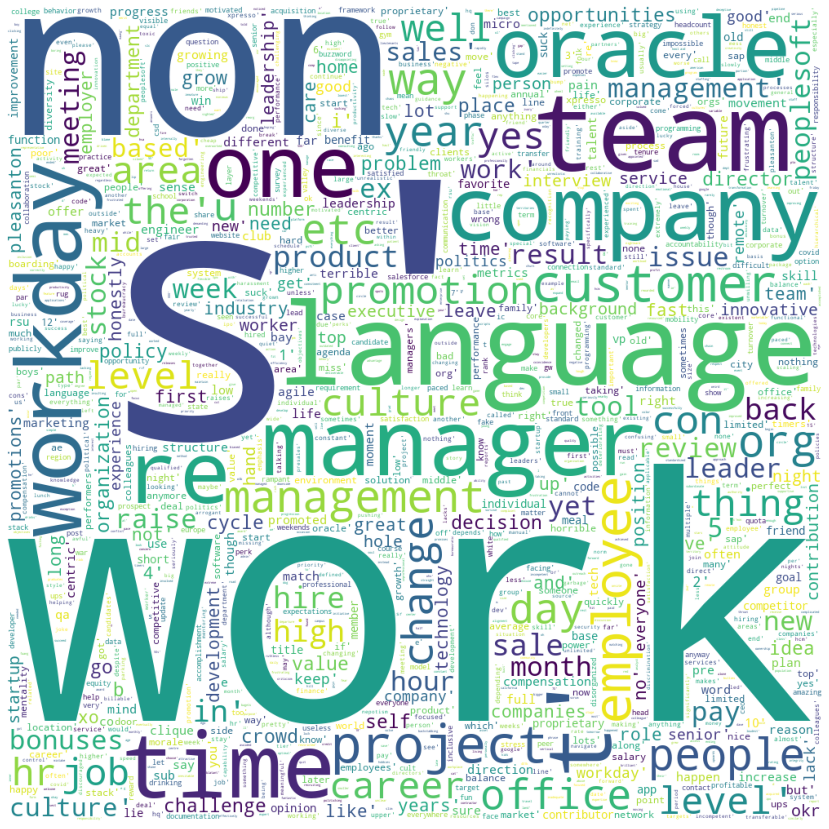

In [27]:
plt.figure(figsize=(15,15))
wordCloudFunction(df_overall, 'cons', 10000000)

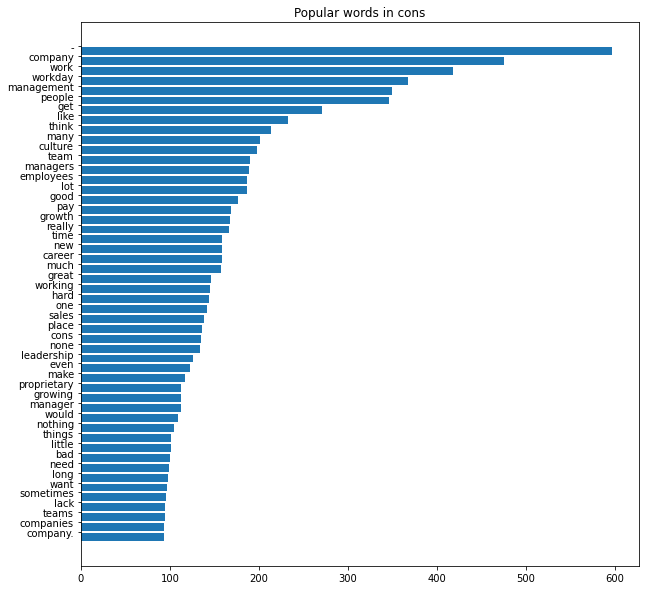

In [24]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df_overall, 'cons', 'Popular words in cons')

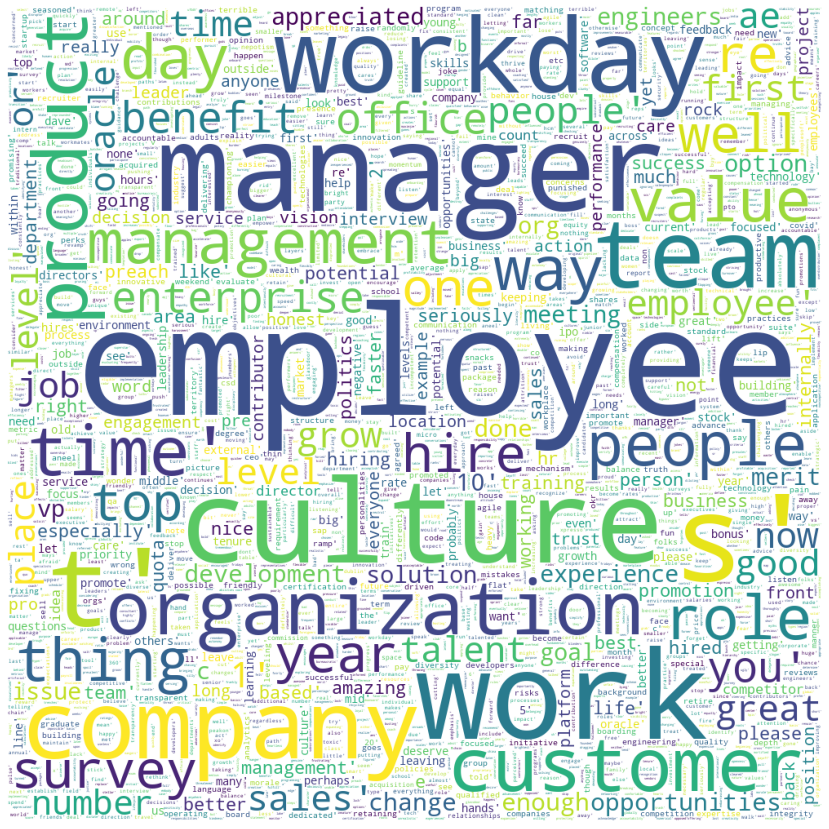

In [28]:
plt.figure(figsize=(15,15))
wordCloudFunction(df_overall, 'advice_to_mgmt', 10000000)

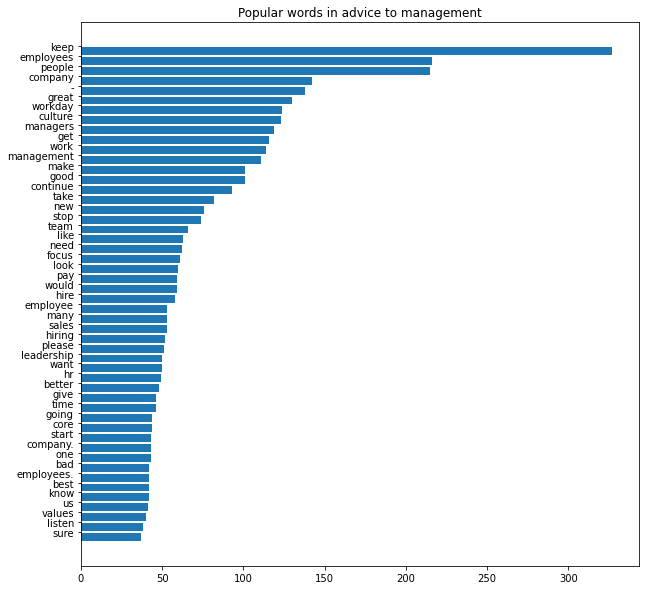

In [30]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df_overall, 'advice_to_mgmt', 'Popular words in advice to management')